## 4.10 Etiquette and Reporting - 3
### Actions 6 -7

In [16]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
path = r'C:\Users\pierr\Instacart Basket Analysis'

In [18]:
ords_prods_all = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'cust_depts_merged.pkl'))

## 6) Create an appropriate visualization for profiles distribution

### Age Group distributions

In [5]:
# Setting variable for age group colors

age_colors = ['powderblue', 'lightskyblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'navy']

In [7]:
age_group_breakdown = ords_prods_all['age_group'].value_counts()
age_group_breakdown

18-29          5817603
70 and over    5812883
40-49          4883179
30-39          4847507
50-59          4841771
60-69          4761621
Name: age_group, dtype: int64

Text(0.5, 0, 'Age Group')

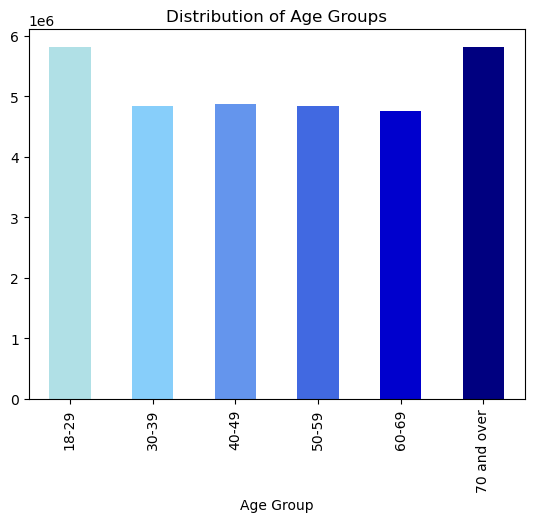

In [6]:
# Show age group distribution

age_group_dist = ords_prods_all['age_group'].value_counts().sort_index().plot.bar(color = age_colors)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")

In [7]:
age_group_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_dist.png'))

In [8]:
# Show age group ordering distribution

age_group_order_counts = ords_prods_all.groupby('age_group')['order_id'].nunique()

Text(0, 0.5, 'Number of Orders')

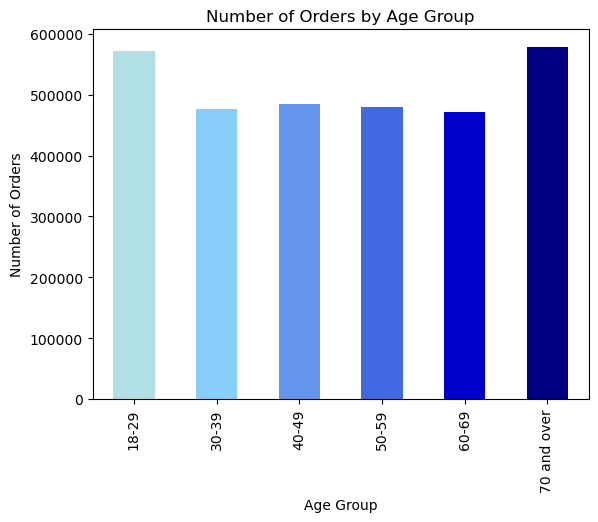

In [9]:
order_counts_by_age = age_group_order_counts.plot.bar(color = age_colors)
plt.title("Number of Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")

In [10]:
order_counts_by_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'orders_by_age.png'))

### Income Group distributions

In [16]:
# Setting variable for income group colors

income_colors = ['yellowgreen', 'limegreen', 'forestgreen', 'darkgreen']

In [8]:
income_group_breakdown = ords_prods_all['income_group'].value_counts()
income_group_breakdown

Middle         11878317
Working         9906734
Upper           9132517
High Wealth       46996
Name: income_group, dtype: int64

Text(0.5, 0, 'Income Group')

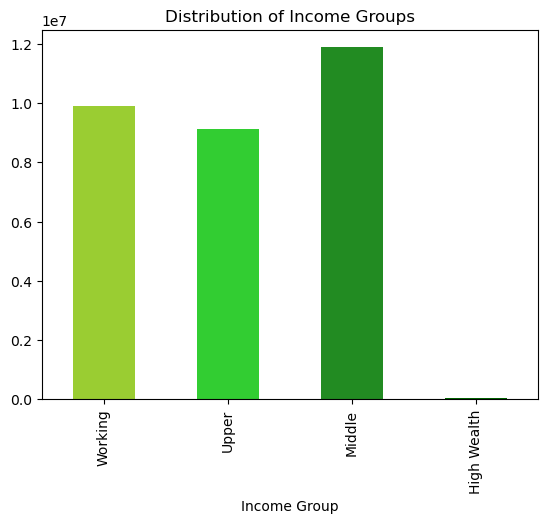

In [17]:
# Show income group distribution

income_group_dist = ords_prods_all['income_group'].value_counts().sort_index(ascending=False).plot.bar(color = income_colors)
plt.title("Distribution of Income Groups")
plt.xlabel("Income Group")

In [18]:
income_group_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_group_dist.png'))

In [19]:
# Show income group ordering distribution

age_group_order_counts = ords_prods_all.groupby('income_group')['order_id'].nunique()

Text(0, 0.5, 'Number of Orders')

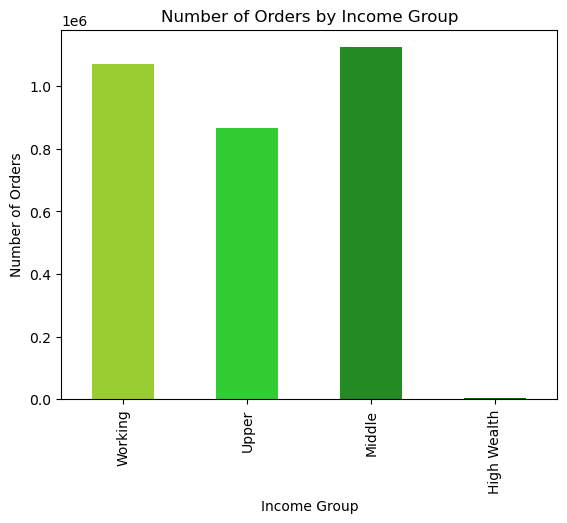

In [20]:
age_group_order_bar = age_group_order_counts.sort_index(ascending=False).plot.bar(color = income_colors)
plt.title("Number of Orders by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Orders")

In [21]:
age_group_order_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'orders_by_income_group.png'))

### Family Type distributions

In [4]:
# Setting variable for family type colors

family_colors = ['violet', 'mediumorchid', 'rebeccapurple', 'indigo']

In [9]:
famt_group_breakdown = ords_prods_all['income_group'].value_counts()
famt_group_breakdown

Middle         11878317
Working         9906734
Upper           9132517
High Wealth       46996
Name: income_group, dtype: int64

Text(0.5, 0, 'Family Type')

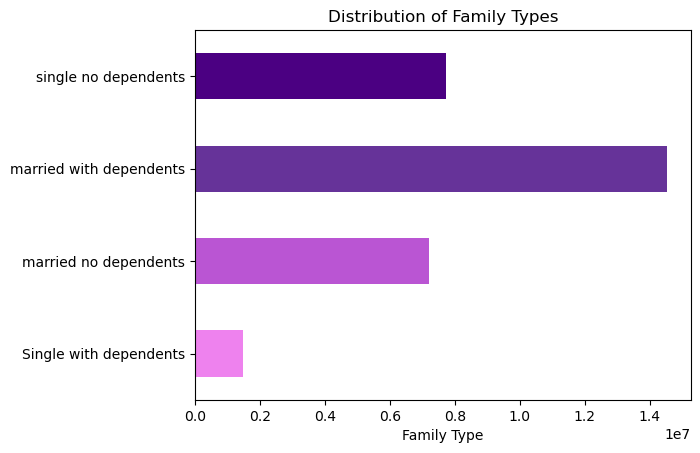

In [33]:
# Show family type distribution

family_type_dist = ords_prods_all['family_type'].value_counts().sort_index().plot.barh(color = family_colors)
plt.title("Distribution of Family Types")
plt.xlabel("Family Type")

In [34]:
family_type_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'family_type_dist.png'))

In [6]:
# Show family type ordering distribution

family_type_ords = ords_prods_all.groupby('family_type')['order_id'].nunique()

Text(0, 0.5, 'Number of Orders')

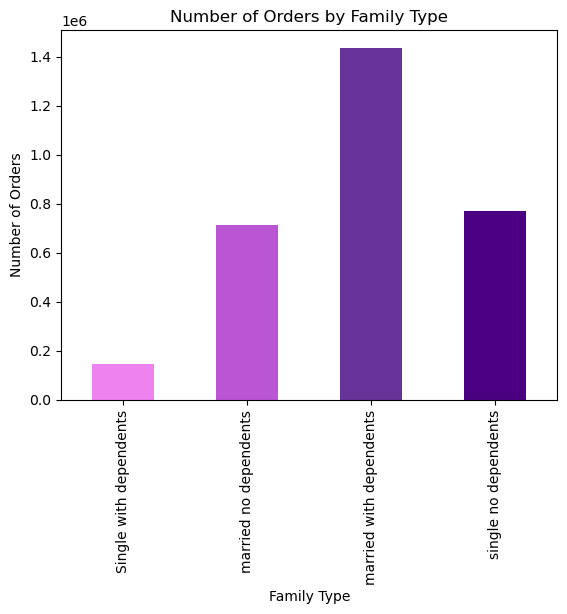

In [9]:
family_order_bar = family_type_ords.sort_index().plot.bar(color = family_colors)
plt.title("Number of Orders by Family Type")
plt.xlabel("Family Type")
plt.ylabel("Number of Orders")

In [10]:
family_order_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'orders_by_family_type.png'))

### Regional distribution

In [48]:
region_colors = ['lightcoral', 'yellow', 'olivedrab', 'mediumturquoise']

Text(0.5, 0, 'Regions')

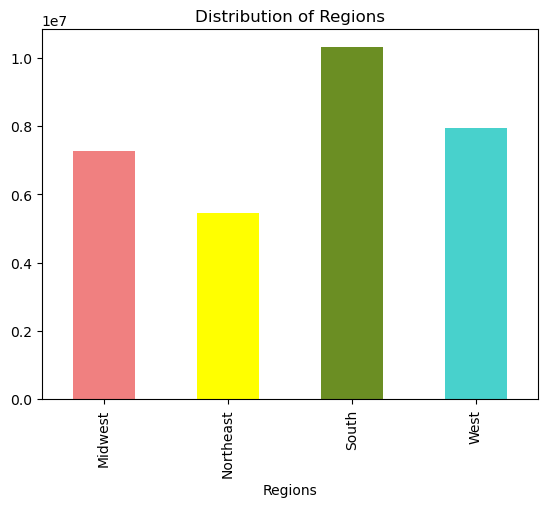

In [50]:
# Show regional distribution

regional_dist = ords_prods_all['region'].value_counts().sort_index().plot.bar(color = region_colors)
plt.title("Distribution of Regions")
plt.xlabel("Regions")

In [51]:
regional_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'regional_dist.png'))

In [52]:
# Show regional ordering distribution

regional_ords = ords_prods_all.groupby('region')['order_id'].nunique()

Text(0, 0.5, 'Orders')

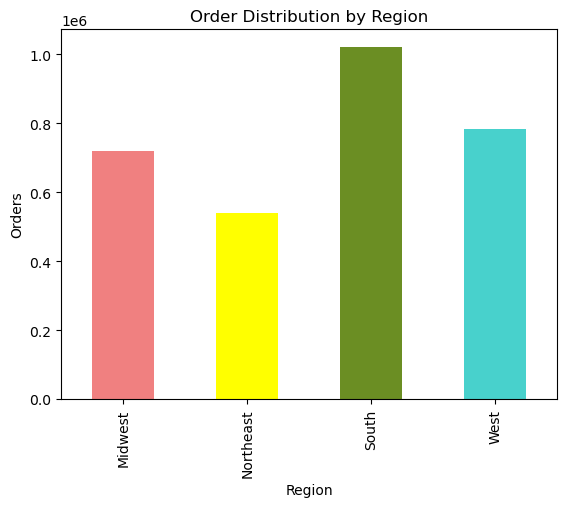

In [59]:
regional_order_bar = regional_ords.sort_index().plot.bar(color = region_colors)
plt.title("Order Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Orders")

In [60]:
regional_order_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'family_type_dow_order_trends.png'))

## 7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Age

In [11]:
age_agg = ords_prods_all.groupby('age_group').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [13]:
age_agg

order_id days_since_prior_order                  prices            \
               count                    min       mean   max    min      mean   
age_group                                                                       
18-29        5817603                    0.0  10.815269  30.0    1.0  7.782206   
30-39        4847507                    0.0  10.806490  30.0    1.0  7.787975   
40-49        4883179                    0.0  10.796786  30.0    1.0  7.798239   
50-59        4841771                    0.0  10.842821  30.0    1.0  7.784996   
60-69        4761621                    0.0  10.791545  30.0    1.0  7.799585   
70 and over  5812883                    0.0  10.808135  30.0    1.0  7.792055   

                   
              max  
age_group          
18-29        25.0  
30-39        25.0  
40-49        25.0  
50-59        25.0  
60-69        25.0  
70 and over  25.0

### Income

In [44]:
income_agg = ords_prods_all.groupby('income_group').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [45]:
income_agg

order_id days_since_prior_order                  prices  \
                 count                    min       mean   max    min   
income_group                                                            
High Wealth      46996                    0.0  10.308500  30.0    1.0   
Middle        11878317                    0.0  10.773662  30.0    1.0   
Upper          9132517                    0.0  10.762281  30.0    1.0   
Working        9906734                    0.0  10.901034  30.0    1.0   

                              
                  mean   max  
income_group                  
High Wealth   7.737854  25.0  
Middle        7.956408  25.0  
Upper         7.953157  25.0  
Working       7.442176  25.0

In [46]:
family_type_agg = ords_prods_all.groupby('family_type').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [47]:
family_type_agg

order_id days_since_prior_order                   \
                            count                    min       mean   max   
family_type                                                                 
Single with dependents    1481172                    0.0  10.750995  30.0   
married no dependents     7211061                    0.0  10.814660  30.0   
married with dependents  14532650                    0.0  10.823959  30.0   
single no dependents      7739681                    0.0  10.791951  30.0   

                        prices                  
                           min      mean   max  
family_type                                     
Single with dependents     1.0  7.800597  25.0  
married no dependents      1.0  7.795588  25.0  
married with dependents    1.0  7.787647  25.0  
single no dependents       1.0  7.789564  25.0

### Regional

In [48]:
regional_agg = ords_prods_all.groupby('region').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [49]:
regional_agg

order_id days_since_prior_order                  prices            \
              count                    min       mean   max    min      mean   
region                                                                         
Midwest     7261513                    0.0  10.892736  30.0    1.0  7.792338   
Northeast   5464685                    0.0  10.774220  30.0    1.0  7.781444   
South      10311139                    0.0  10.814227  30.0    1.0  7.794444   
West        7927227                    0.0  10.754622  30.0    1.0  7.790302   

                 
            max  
region           
Midwest    25.0  
Northeast  25.0  
South      25.0  
West       25.0

### Babies or No

In [50]:
dependent_type_agg = ords_prods_all.groupby('dependent_type').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [51]:
dependent_type_agg

order_id days_since_prior_order                   \
                           count                    min       mean   max   
dependent_type                                                             
babies in household      7354162                    0.0   9.377248  30.0   
no babies in household  23610402                    0.0  11.264787  30.0   

                       prices                  
                          min      mean   max  
dependent_type                                 
babies in household       1.0  7.832765  25.0  
no babies in household    1.0  7.777460  25.0

### Parental Age

In [52]:
parental_age_agg = ords_prods_all.groupby('parental_age').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [53]:
parental_age_agg

order_id days_since_prior_order                  prices  \
                 count                    min       mean   max    min   
parental_age                                                            
older parent  26594579                    0.0  10.815103  30.0    1.0   
young parent   4369985                    0.0  10.781080  30.0    1.0   

                              
                  mean   max  
parental_age                  
older parent  7.791354  25.0  
young parent  7.785975  25.0

### Loyalty

In [54]:
loyalty_agg = ords_prods_all.groupby('loyalty_flag').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [55]:
loyalty_agg

order_id days_since_prior_order                  prices  \
                     count                    min       mean   max    min   
loyalty_flag                                                                
Loyal customer    10284093                    0.0   6.026656  30.0    1.0   
New customer       4803695                    0.0  17.598691  30.0    1.0   
Regular customer  15876776                    0.0  12.155135  30.0    1.0   

                                  
                      mean   max  
loyalty_flag                      
Loyal customer    7.773559  25.0  
New customer      7.801687  25.0  
Regular customer  7.798274  25.0

### Family Status

In [14]:
fams_agg = ords_prods_all.groupby('fam_status').agg({
    'order_id': 'count',
    'days_since_prior_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
})

In [15]:
fams_agg

order_id days_since_prior_order             \
                                     count                    min       mean   
fam_status                                                                     
divorced/widowed                   2645271                    0.0  10.750328   
living with parents and siblings   1481172                    0.0  10.750995   
married                           21743711                    0.0  10.820875   
single                             5094410                    0.0  10.813571   

                                       prices                  
                                   max    min      mean   max  
fam_status                                                     
divorced/widowed                  30.0    1.0  7.800999  25.0  
living with parents and siblings  30.0    1.0  7.800597  25.0  
married                           30.0    1.0  7.790281  25.0  
single                            30.0    1.0  7.783626  25.0